In [2]:
from nltk.tokenize import TreebankWordTokenizer
sentence ="""The faster harry got to the store , the faster harry ,the faster, would get Home."""
tokenizer =TreebankWordTokenizer()
print(len(sentence))
tokenizer.tokenize(sentence)
tokens =tokenizer.tokenize(sentence.lower())
tokens

81


['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

A collections.Counter object is an unordered collection, also
called a bag or multiset. Depending on your platform and Python version,
you may find that a Counter is displayed in a seemingly reasonable order,
like lexical order or the order that tokens appeared in your statement. But
just as for a standard Python dict, you cannot rely on the order of your
tokens (keys) in a Counter.


In [3]:
from collections import Counter
bag_of_words =Counter(tokens)
print(bag_of_words.most_common(2))
print(bag_of_words)
print(bag_of_words['harry'])
#number of unique tokens from your original source
num_unique_words =len(bag_of_words)
print(num_unique_words)


[('the', 4), ('faster', 3)]
Counter({'the': 4, 'faster': 3, ',': 3, 'harry': 2, 'got': 1, 'to': 1, 'store': 1, 'would': 1, 'get': 1, 'home': 1, '.': 1})
2
11


In [4]:
#term frequencies
tf =bag_of_words['harry']/(num_unique_words)
print(round(tf,3))

0.182


In [5]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
tokenizer =TreebankWordTokenizer()
kite_text="""A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react
against the air to create lift and drag. A kite consists of wings, tethers, and anchors.
Kites often have a bridle to guide the face of the kite at the correct angle so the wind
can lift it. A kite’s wing also may be so designed so a bridle is not needed; when
kiting a sailplane for launch, the tether meets the wing at a single point. A kite may
have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of
tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is
still often called the kite.
The lift that sustains the kite in flight is generated when air flows around the kite’s
surface, producing low pressure above and high pressure below the wings. The
interaction with the wind also generates horizontal drag along the direction of the
wind. The resultant force vector from the lift and drag force components is opposed
by the tension of one or more of the lines or tethers to which the kite is attached. The
anchor point of the kite line may be static or moving (such as the towing of a kite by
a running person, boat, free-falling anchors as in paragliders and fugitive parakites
or vehicle).
The same principles of fluid flow apply in liquids and kites are also used under water.
A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite
lifting surface is called a kytoon
Kites have a long and varied history and many different types are flown
individually and at festivals worldwide. Kites may be flown for recreation, art or
other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a
competition. Power kites are multi-line steerable kites designed to generate large forces
which can be used to power activities such as kite surfing, kite landboarding, kite
fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have
been made.

"""
tokens = tokenizer.tokenize(kite_text.lower())
token_counts= Counter(tokens)
len(token_counts)

179

In [6]:
import nltk
nltk.download('stopwords' , quiet=True)
stopwords =nltk.corpus.stopwords.words('english')
tokens = [x for x in tokens if x not in stopwords ]
kite_counts =Counter(tokens)
len(kite_counts)

146

In [7]:
#Vectorizing
document_vector=[]
doc_length =len(tokens)
for key ,value in kite_counts.most_common():
  document_vector.append(value/doc_length)
print(document_vector)


[0.06422018348623854, 0.06422018348623854, 0.03669724770642202, 0.022935779816513763, 0.01834862385321101, 0.01834862385321101, 0.013761467889908258, 0.013761467889908258, 0.013761467889908258, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.009174311926605505, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0

In [8]:
docs =["The faster Harry got to the store , the faster and faster Harry would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")
doc_tokens=[]
for doc in docs:
  doc_tokens = doc_tokens +[sorted(tokenizer.tokenize(doc.lower()))]

print(len(doc_tokens[0]))
all_doc_tokens =sum(doc_tokens,[])
print(len(all_doc_tokens))
lexicon =sorted(set(all_doc_tokens))
print(lexicon)
print(len(lexicon))

17
33
[',', '.', 'and', 'as', 'faster', 'get', 'got', 'hairy', 'harry', 'home', 'is', 'jill', 'not', 'store', 'than', 'the', 'to', 'would']
18


In [9]:
from collections import OrderedDict
zero_vector =OrderedDict((token,0) for token in lexicon)
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [10]:
import copy
doc_vectors=[]
for dooc in docs:
  vex =copy.copy(zero_vector)
  tokens =tokenizer.tokenize(dooc.lower())
  token_counts =Counter(tokens)
  for key,value in token_counts.items():
    vex[key]=round(value/len(lexicon),4)
  doc_vectors.append(vex)

print(doc_vectors)

[OrderedDict([(',', 0.0556), ('.', 0.0556), ('and', 0.0556), ('as', 0), ('faster', 0.1667), ('get', 0.0556), ('got', 0.0556), ('hairy', 0), ('harry', 0.1111), ('home', 0.0556), ('is', 0), ('jill', 0), ('not', 0), ('store', 0.0556), ('than', 0), ('the', 0.1667), ('to', 0.0556), ('would', 0.0556)]), OrderedDict([(',', 0), ('.', 0.0556), ('and', 0.0556), ('as', 0), ('faster', 0.0556), ('get', 0), ('got', 0), ('hairy', 0.0556), ('harry', 0.0556), ('home', 0), ('is', 0.0556), ('jill', 0.0556), ('not', 0), ('store', 0), ('than', 0.0556), ('the', 0), ('to', 0), ('would', 0)]), OrderedDict([(',', 0), ('.', 0.0556), ('and', 0), ('as', 0.1111), ('faster', 0), ('get', 0), ('got', 0), ('hairy', 0.0556), ('harry', 0.0556), ('home', 0), ('is', 0.0556), ('jill', 0.0556), ('not', 0.0556), ('store', 0), ('than', 0), ('the', 0), ('to', 0), ('would', 0)])]


In [11]:
import math

def cosine_sim(vec1 ,vec2):

  vec1 =[val for val in vec1.values()]
  vec2 =[val for val in vec2.values()]

  dot_prod =0
  for i,v in enumerate(vec1):
    dot_prod +=v*vec2[i]

  mag_1 =math.sqrt(sum([x**2 for x in vec1]))
  mag_2 =math.sqrt(sum([x**2 for x in vec2]))

  return dot_prod/(mag_1*mag_2)

In [12]:
cosine_sim(doc_vectors[0],doc_vectors[1])

0.44447830760273627

In [13]:
# nltk.download('brown')
from nltk.corpus import brown
print(brown.tagged_words()[:7])
print(len(brown.words()))
brown.words()[:10]

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR')]
1161192


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
puncs =set((',', '.', '--', '-', '!', '?',':', ';', '``', "''", '(', ')', '[', ']'))
word_list =(x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
sore=sorted(token_counts.values(),reverse=True)


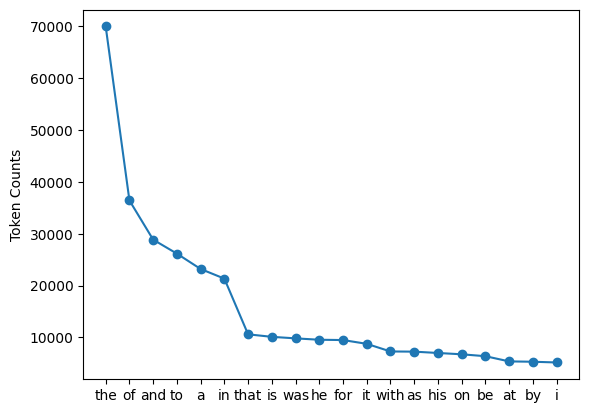

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
puncs =set((',', '.', '--', '-', '!', '?',':', ';', '``', "''", '(', ')', '[', ']'))
word_list =(x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
# Sort the token counts by frequency
most_common_100 = token_counts.most_common(20)
# Extract the words and counts
words, counts = zip(*most_common_100)
# Plot the counts
plt.plot(words, counts, marker='o')

plt.ylabel('Token Counts')
plt.show()

In [16]:
#Topic modeling
kite_text = """A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite's wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite.

The lift that sustains the kite in flight is generated when air flows around the kite's surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (e.g., the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle).

The same principles of fluid flow apply in liquids and kites are also used under water.

A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon.

Kites have a long and varied history and many different types are flown individually and at festivals worldwide. Kites may be flown for recreation, art or other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a competition. Power kites are multi-line steerable kites designed to generate large forces which can be used to power activities such as kite surfing, kite landboarding, kite fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have been made.
"""

kite_history="""Kites were invented in China, where materials ideal for kite building were readily available: silk fabric for sail material; fine, high-tensile-strength silk for flying line; and resilient bamboo for a strong, lightweight framework.

The kite has been claimed as the invention of the 5th-century BC Chinese philosophers Mozi (also Mo Di) and Lu Ban (also Gongshu Ban). By 549 AD paper kites were certainly being flown, as it was recorded that in that year a paper kite was used as a message for a rescue mission. Ancient and medieval Chinese sources describe kites being used for measuring distances, testing the wind, lifting men, signaling, and communication for military operations. The earliest known Chinese kites were flat (not bowed) and often rectangular. Later, tailless kites incorporated a stabilizing bowline. Kites were decorated with mythological motifs and legendary figures; some were fitted with strings and whistles to make musical sounds while flying. From China, kites were introduced to Cambodia, Thailand, India, Japan, Korea and the western world.

After its introduction into India, the kite further evolved into the fighter kite, known as the patang in India, where thousands are flown every year on festivals such as Makar Sankranti.

Kites were known throughout Polynesia, as far as New Zealand, with the assumption being that the knowledge diffused from China along with the people. Anthropomorphic kites made from cloth and wood were used in religious ceremonies to send prayers to the gods. Polynesian kite traditions are used by anthropologists get an idea of early "primitive" Asian traditions that are believed to have at one time existed in Asia.
"""
kite_Intro =kite_text.lower()
intro_tokens =tokenizer.tokenize(kite_Intro)
print(f"{intro_tokens} \n\n length og kite_text:{len(intro_tokens)}")

kite_history =kite_history.lower()
history_tokens =tokenizer.tokenize(kite_history)
print(f"{history_tokens} \n\n length og kite_history:{len(history_tokens)}")

['a', 'kite', 'is', 'traditionally', 'a', 'tethered', 'heavier-than-air', 'craft', 'with', 'wing', 'surfaces', 'that', 'react', 'against', 'the', 'air', 'to', 'create', 'lift', 'and', 'drag.', 'a', 'kite', 'consists', 'of', 'wings', ',', 'tethers', ',', 'and', 'anchors.', 'kites', 'often', 'have', 'a', 'bridle', 'to', 'guide', 'the', 'face', 'of', 'the', 'kite', 'at', 'the', 'correct', 'angle', 'so', 'the', 'wind', 'can', 'lift', 'it.', 'a', 'kite', "'s", 'wing', 'also', 'may', 'be', 'so', 'designed', 'so', 'a', 'bridle', 'is', 'not', 'needed', ';', 'when', 'kiting', 'a', 'sailplane', 'for', 'launch', ',', 'the', 'tether', 'meets', 'the', 'wing', 'at', 'a', 'single', 'point.', 'a', 'kite', 'may', 'have', 'fixed', 'or', 'moving', 'anchors.', 'untraditionally', 'in', 'technical', 'kiting', ',', 'a', 'kite', 'consists', 'of', 'tether-set-coupled', 'wing', 'sets', ';', 'even', 'in', 'technical', 'kiting', ',', 'though', ',', 'a', 'wing', 'in', 'the', 'system', 'is', 'still', 'often', 'call

In [17]:
intro_tf={}
history_tf={}
intro_counts=Counter(intro_tokens)
history_counts =Counter(history_tokens)
intro_tf['kite'] =intro_counts['kite']/len(intro_tokens)
history_tf['kite'] =history_counts['kite']/len(history_tokens)
print(intro_tf)
print(history_tf)


{'kite': 0.0440771349862259}
{'kite': 0.020202020202020204}


In [18]:
intro_tf['and'] =intro_counts['and']/len(intro_tokens)
history_tf['and'] =history_counts['and']/len(history_tokens)
print(intro_tf)
print(history_tf)

{'kite': 0.0440771349862259, 'and': 0.027548209366391185}
{'kite': 0.020202020202020204, 'and': 0.030303030303030304}


In [19]:
intro_tf['china'] =intro_counts['china']/len(intro_tokens)
history_tf['china'] =history_counts['china']/len(history_tokens)
print(intro_tf)
print(history_tf)

{'kite': 0.0440771349862259, 'and': 0.027548209366391185, 'china': 0.0}
{'kite': 0.020202020202020204, 'and': 0.030303030303030304, 'china': 0.010101010101010102}


In [20]:
num_docs_containing_and =0
num_docs_containing_kite =0
num_docs_containing_china=0
for doc in [intro_tokens,history_tokens]:
  if 'and' in doc:
    num_docs_containing_and +=1
  if 'china' in doc:
    num_docs_containing_china +=1
  if 'kite' in doc:
    num_docs_containing_kite +=1

num_docs=2
intro_idf ={}
history_idf ={}
intro_idf['and'] =num_docs/num_docs_containing_and
history_idf['and'] =num_docs/num_docs_containing_and
intro_idf['kite'] = num_docs / num_docs_containing_kite
history_idf['kite'] = num_docs / num_docs_containing_kite
intro_idf['china'] = num_docs / num_docs_containing_china
history_idf['china'] = num_docs / num_docs_containing_china
print(intro_idf)
print(history_idf)

{'and': 1.0, 'kite': 1.0, 'china': 2.0}
{'and': 1.0, 'kite': 1.0, 'china': 2.0}


In [21]:
intro_tfidf = {}
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

history_tfidf={}
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

print(intro_tfidf)
print(history_tfidf)

{'and': 0.027548209366391185, 'kite': 0.0440771349862259, 'china': 0.0}
{'and': 0.030303030303030304, 'kite': 0.020202020202020204, 'china': 0.020202020202020204}


In [22]:
document_tfidf_vectors=[]
for doc in docs :
  vec =copy.copy(zero_vector)
  tokens=tokenizer.tokenize(doc.lower())
  token_counts =Counter(tokens)

  for key,value in token_counts.items():
    docs_containing_key =0
    for _doc in docs:
      if key in _doc:
        docs_containing_key +=1
    tf =value/len(lexicon)
    if docs_containing_key:
      idf =len(docs)/docs_containing_key
    else:
      idf =0
    vec[key] =tf*idf
  document_tfidf_vectors.append(vec)
document_tfidf_vectors


[OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 0.16666666666666666),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.16666666666666666),
              ('than', 0),
              ('the', 0.5),
              ('to', 0.16666666666666666),
              ('would', 0.16666666666666666)]),
 OrderedDict([(',', 0),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.08333333333333333),
              ('get', 0),
              ('got', 0),
              ('hairy', 0.08333333333333333),
              ('harry', 0.0),
              ('home', 0),
              ('i

Two vectors are considered similar if their cosine similarity is high, so you can find
two similar vectors near each other if they minimize

In [23]:
query = "How long does it take to get to the store?"
query_vec= copy.copy(zero_vector)
tokens = tokenizer.tokenize(query.lower())
token_counts =Counter(tokens)
tokens
for key,value in token_counts.items():
  docs_containing_key = 0
  for doc in docs:
    if key in doc.lower():
      docs_containing_key +=1
    if docs_containing_key ==0:
      continue

    tf =value/len(tokens)
    idf =len(docs)/docs_containing_key
    query_vec[key] =tf*idf


print(cosine_sim(query_vec,document_tfidf_vectors[0]))
print(cosine_sim(query_vec,document_tfidf_vectors[1]))
print(cosine_sim(query_vec,document_tfidf_vectors[2]))


0.6132857433407973
0.0
0.0


In [24]:
#Tools
# !pip install scipy
# !pip install sklearn
# !pip install --upgrade setuptools

The **TFIDFVectorizer** model produces a sparse numpy matrix, because
a TF-IDF matrix usually contains mostly zeros, since most documents
use a small portion of the total words in the vocabulary

The **.todense()** method converts a sparse matrix
back into a regular numpy matrix (filling in the
gaps with zeros) for your viewing pleasure

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus =docs
vectorizer =TfidfVectorizer(min_df=1)
model =vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(model.todense().round(2))

['and' 'as' 'faster' 'get' 'got' 'hairy' 'harry' 'home' 'is' 'jill' 'not'
 'store' 'than' 'the' 'to' 'would']
[[0.16 0.   0.48 0.21 0.21 0.   0.25 0.21 0.   0.   0.   0.21 0.   0.64
  0.21 0.21]
 [0.37 0.   0.37 0.   0.   0.37 0.29 0.   0.37 0.37 0.   0.   0.49 0.
  0.   0.  ]
 [0.   0.75 0.   0.   0.   0.29 0.22 0.   0.29 0.29 0.38 0.   0.   0.
  0.   0.  ]]


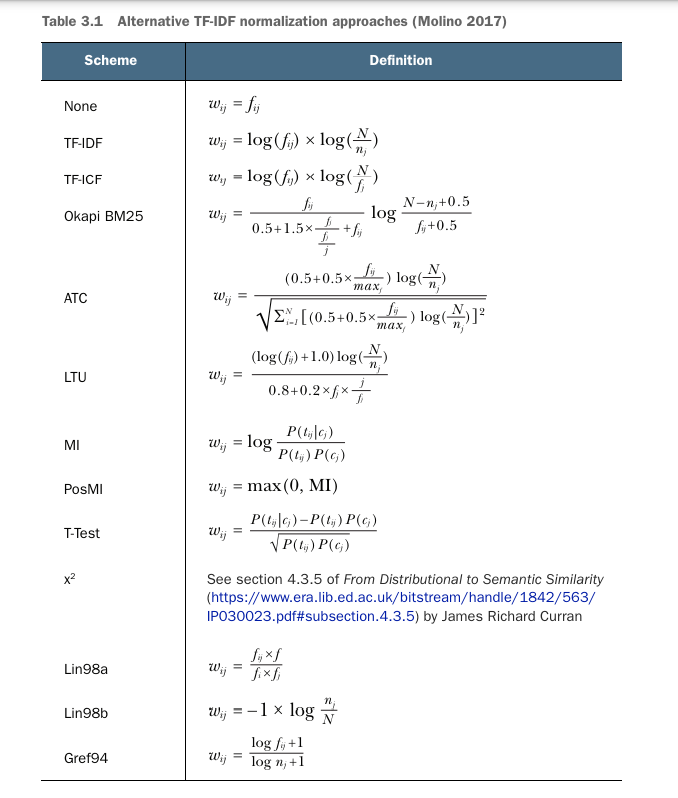